<a href="https://colab.research.google.com/github/Mnd6502/Mnd6502/blob/main/Statistics_for_the_Intercept_and_Slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses simulations to approximate statistics related to linear regression.  We compare these sample statistics to theoretical values given in the textbook.

In [ ]:
library(ggplot2)

In [ ]:
# Define the actual relationship between x and y.
f <- function(t) 0.5*t+1

In [ ]:
# Generate a set of xy-pairs.
# These points are normally distributed 
# about the line y = 0.5x + 1
generate_points <- function(){
  # Generate a unform random sample of 100 points.
  x = runif(100, min = 0, max = 6)

  # Generate points near the line y=0.5x+1
  # with normally distributed errors.
  y <- f(x) + rnorm(100, 0, 1)

  # Put the results into a dataframe.
  df = data.frame(x = x, y = y)
  return(df)
}

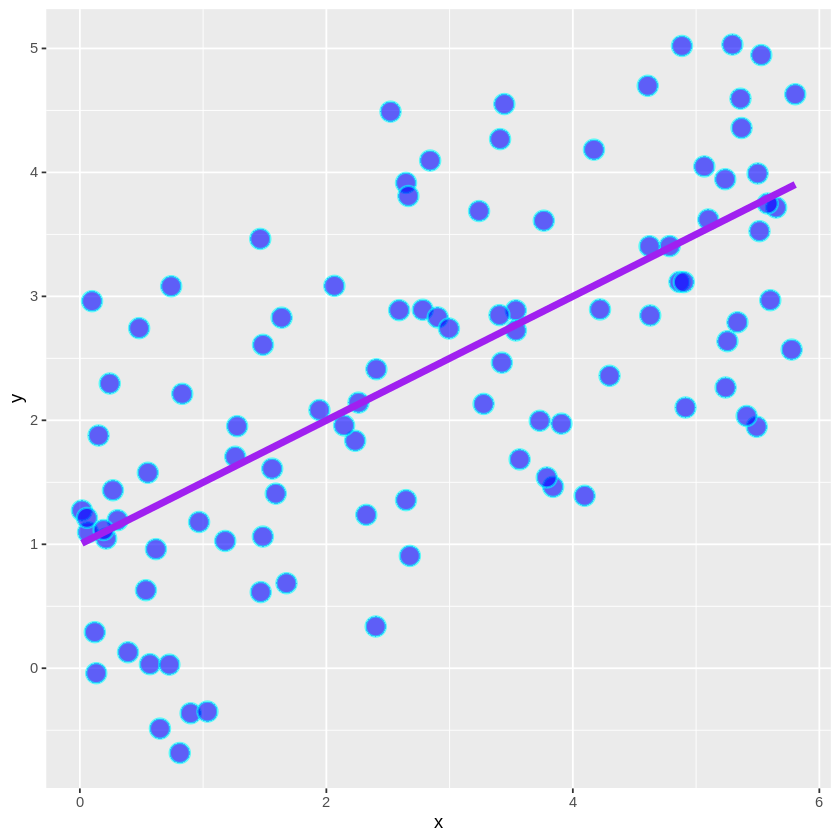

In [ ]:
# Generate a set of points and plot them.
points_df = generate_points()
points = ggplot(points_df, aes(x=x, y=y)) + 
    geom_point(size = 5, fill = "blue", color = "cyan", stroke = 1, shape = 21, alpha = 0.6) 
points + geom_function(fun = f, colour = "purple", size = 2)

In [ ]:
# Generate parameters (slope and intercept)
# based on a random sample of points.
generate_params <- function(points_df){
  linear_model = lm(points_df$y~points_df$x)
  coeffs <- summary(linear_model)$coefficients
  intersept = coeffs["(Intercept)", "Estimate"]
  slope = coeffs["points_df$x", "Estimate"]
  return(c(slope, intersept))
}

In [ ]:
# Repeatedly generate parameters (slope and intercept)
# based on new samples.
si_df = data.frame(matrix(ncol = 2, nrow = 0))
colnames(si_df) <-c("slope_est", "intercept_est")
num_trials = 50

for (i in 1:num_trials){
  points_df = generate_points()
  params = generate_params(points_df)
  si_df[nrow(si_df) + 1,] <- params
}
si_df

,slope_est,intercept_est
,<dbl>,<dbl>
1,0.5044545,0.9024150
2,0.4653690,1.2156131
3,0.5072236,0.9548474
4,0.4794569,1.0533305
5,0.4775397,0.9830192
6,0.4241874,1.1263153
7,0.6071749,0.6309575
8,0.5184315,0.9875501
9,0.5467616,0.8214225


We can now calculate the sample mean and variance for each parameter.

In [ ]:
var(si_df$intercept_est)

[1] 0.05267739

In [ ]:
mean(si_df$intercept_est)

[1] 1.055703

In [ ]:
var(si_df$slope_est)

[1] 0.00415518

In [ ]:
mean(si_df$slope_est)

[1] 0.4822624

Now we compare our sample values with the theoretical values given in the textbook.

The theoretical value of Var($\hat{B_1}$) is $\frac{\sigma^2}{S_{xx}}$, so we calculate $S_{xx}$ and use the fact that Var($y_i)=\sigma^2$ is the constant 1.

In [ ]:
x <- points_df$x
y <- points_df$y
n <- length(x)
Sxx <- sum(x^2) - sum(x)^2/n
Sxx

[1] 289.1905

In [ ]:
# Theoretical estimate for variance of B1H.
VarB1H <- 1/Sxx
VarB1H

[1] 0.003457928

Similarly, the sample variance for $\hat{B_0}$ should be close to $\sigma^2\left(\frac{1}{n}+\frac{\overline{x}^2}{S_{xx}}\right)$.

In [ ]:
# Theoretical value for variance of B0H.
VarB0H <- 1*(1/n + mean(x)^2/Sxx)
VarB0H

[1] 0.04076956

Even though we know that $\sigma^2 = 1$, we can use the estimator given in the textbook: $\hat{\sigma}^2 = \frac{SS_{Res}}{n-2}$.

In [ ]:
sigma2H <- sum((f(x) - y)^2)/(n-2)
sigma2H

[1] 1.002602

. . . and indeed, the result is very close to 1.